<a href="https://colab.research.google.com/github/pujitha014/MACHINE_LEARNING/blob/main/Diabetes_prediction_using_ann.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import sklearn.datasets
from sklearn.model_selection import train_test_split

Data Collection & Processing

In [ ]:

diabetes_dataset = pd.read_csv('diabetes.csv')

In [ ]:
print(diabetes_dataset) #shape of the dataset 768 rows x 9 columns

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  Outcome  
0                       0.627   50        1  
1                  

In [ ]:
diabetes_dataset.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [ ]:
diabetes_dataset['Outcome'].value_counts() #0->nn-diabitic 1->diabitic

0    500
1    268
Name: Outcome, dtype: int64

In [ ]:
# print last 5 rows of the dataframe
diabetes_dataset.tail()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
763,10,101,76,48,180,32.9,0.171,63,0
764,2,122,70,27,0,36.8,0.340,27,0
765,5,121,72,23,112,26.2,0.245,30,0
766,1,126,60,0,0,30.1,0.349,47,1
767,1,93,70,31,0,30.4,0.315,23,0


In [ ]:
# getting some information about the data
diabetes_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
# checking for missing values
diabetes_dataset.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [ ]:
# statistical measures about the data
diabetes_dataset.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [ ]:
# checking the distribution of Target Varibale
diabetes_dataset['Outcome'].value_counts()

0    500
1    268
Name: Outcome, dtype: int64

1 --> diabetic

0 --> non-diabetic

In [ ]:
diabetes_dataset.groupby('Outcome').mean()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Outcome,,,,,,,,
0,3.298000,109.980000,68.184000,19.664000,68.792000,30.304200,0.429734,31.190000
1,4.865672,141.257463,70.824627,22.164179,100.335821,35.142537,0.550500,37.067164


Separating the features and target

In [ ]:
#seperating the features and data and labels
X = diabetes_dataset.drop(columns = 'Outcome', axis=1)
Y = diabetes_dataset['Outcome']

In [ ]:
print(X)

     Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI  \
0              6      148             72             35        0  33.6   
1              1       85             66             29        0  26.6   
2              8      183             64              0        0  23.3   
3              1       89             66             23       94  28.1   
4              0      137             40             35      168  43.1   
..           ...      ...            ...            ...      ...   ...   
763           10      101             76             48      180  32.9   
764            2      122             70             27        0  36.8   
765            5      121             72             23      112  26.2   
766            1      126             60              0        0  30.1   
767            1       93             70             31        0  30.4   

     DiabetesPedigreeFunction  Age  
0                       0.627   50  
1                       0.351   31  


In [ ]:
print(Y)

0      1
1      0
2      1
3      0
4      1
      ..
763    0
764    0
765    0
766    1
767    0
Name: Outcome, Length: 768, dtype: int64


Splitting the data into training data & Testing data

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=2)

In [ ]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


Standardize the data to increase the accuracy of the code

In [ ]:
from sklearn.preprocessing import StandardScaler

In [ ]:
scaler = StandardScaler()

X_train_std = scaler.fit_transform(X_train)

X_test_std = scaler.transform(X_test)

neural networking with inbuitt function tensorflow and kesars

In [ ]:
# importing tensorflow and Keras
#tensorflow is a library which developed by google -for neuralnetwokes
import tensorflow as tf
tf.random.set_seed(3) #in order to maintain the same accuracy in the code we use this (when we run several times)
from tensorflow import keras

In [ ]:
# setting up the layers of Neural Network

model = keras.Sequential([
                          keras.layers.Flatten(input_shape=(8,)), #input layer -flatten is for to convert the matrix to the linear
                          keras.layers.Dense(1000, activation='relu'), #hidden layer
                          keras.layers.Dense(2, activation='sigmoid') #output layer-no of neurons in output layers is equal to the no of classes we have in our data set
])

In [ ]:
# compiling the Neural Network

model.compile(optimizer='adam',      #adam updates the weights
              loss='sparse_categorical_crossentropy',  # errors-sparse is used for integers
              metrics=['accuracy']) #acccuracy predictions of a data


In [ ]:
# training the neural Network

history = model.fit(X_train_std, Y_train, validation_split=0.1, epochs=100) #epoches its just like how many time it should go through-iterators

#we can also use x_train instead of x_train_std-print and check there will be the difference in the accuracy level

Epoch 1/100
18/18 [==============================] - 1s 12ms/step - loss: 0.5763 - accuracy: 0.6957 - val_loss: 0.3997 - val_accuracy: 0.9032
Epoch 2/100
18/18 [==============================] - 0s 3ms/step - loss: 0.4853 - accuracy: 0.7627 - val_loss: 0.3489 - val_accuracy: 0.8871
Epoch 3/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4681 - accuracy: 0.7754 - val_loss: 0.3564 - val_accuracy: 0.8710
Epoch 4/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4591 - accuracy: 0.7699 - val_loss: 0.3583 - val_accuracy: 0.8548
Epoch 5/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4523 - accuracy: 0.7899 - val_loss: 0.3493 - val_accuracy: 0.8548
Epoch 6/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4498 - accuracy: 0.7808 - val_loss: 0.3466 - val_accuracy: 0.8548
Epoch 7/100
18/18 [==============================] - 0s 4ms/step - loss: 0.4490 - accuracy: 0.7772 - val_loss: 0.3483 - val_accuracy: 0.8710
Epoch 8/100


Visualizing accuracy and loss

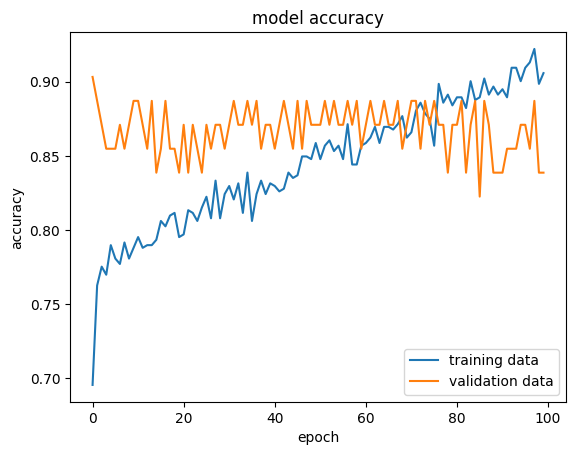

In [ ]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'lower right')

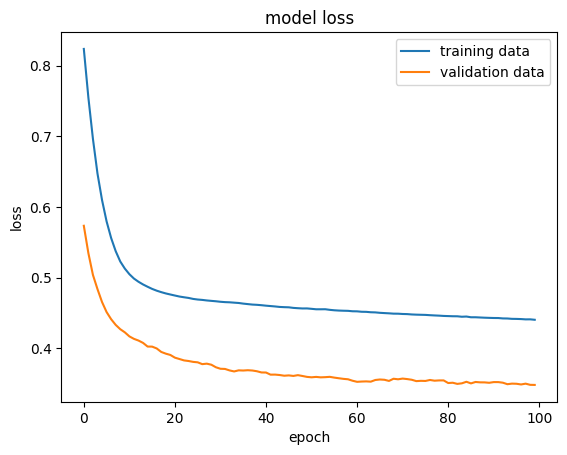

In [ ]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])

plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')

plt.legend(['training data', 'validation data'], loc = 'upper right')

Accuracy of the model on test data

In [ ]:
loss, accuracy = model.evaluate(X_test_std, Y_test)
print(accuracy)

5/5 [==============================] - 0s 2ms/step - loss: 0.4862 - accuracy: 0.7857
0.7857142686843872


In [ ]:
print(X_test_std.shape)
print(X_test_std[0])

(154, 8)
[-0.56211528 -1.06707571  0.25332145 -0.07781693 -0.24192663 -0.35959631
 -0.72413845 -0.96676677]


In [ ]:
Y_pred = model.predict(X_test_std)

5/5 [==============================] - 0s 2ms/step


In [ ]:
print(Y_pred.shape)
print(Y_pred[0])

(154, 2)
[0.45208472 0.0095437 ]


In [ ]:
print(X_test_std)

[[-0.56211528 -1.06707571  0.25332145 ... -0.35959631 -0.72413845
  -0.96676677]
 [-0.56211528  0.22210046  0.76614496 ... -0.48754724 -0.56253608
  -0.53568849]
 [-1.15412006 -0.62686921  0.45845086 ...  0.34413383 -0.69769443
  -0.79433546]
 ...
 [-1.15412006  0.31643043  0.45845086 ...  0.07543687 -0.24226957
  -1.05298243]
 [ 0.32589188  0.47364703  1.99692139 ...  2.17383219 -0.7300149
   0.32646808]
 [-0.85811767 -1.53872552 -0.97745497 ... -1.12730191 -0.66831218
  -1.05298243]]


In [ ]:
print(Y_pred)

[[4.52084720e-01 9.54370108e-03]
 [2.18642458e-01 3.88728864e-02]
 [3.90949309e-01 1.86310355e-02]
 [3.79354864e-01 4.38441515e-01]
 [3.95798296e-01 4.96187121e-01]
 [4.14651811e-01 2.32204199e-02]
 [5.63913226e-01 2.68657543e-02]
 [1.29812106e-01 5.03510348e-02]
 [5.99968195e-01 4.49820384e-02]
 [2.43625388e-01 3.06476146e-01]
 [6.74352050e-01 6.39658988e-01]
 [6.33746922e-01 4.63496119e-01]
 [4.94173378e-01 7.83808410e-01]
 [2.75689393e-01 5.32783270e-02]
 [7.46923029e-01 8.14379826e-02]
 [4.69893187e-01 8.85749936e-01]
 [9.14781243e-02 5.16942501e-01]
 [5.61296225e-01 1.41199380e-02]
 [3.72281909e-01 7.40757883e-02]
 [5.11279643e-01 7.59492159e-01]
 [4.72927183e-01 9.45015192e-01]
 [1.66717127e-01 7.27113187e-01]
 [4.89881337e-01 3.94648463e-02]
 [2.09607095e-01 2.10163563e-01]
 [5.74755192e-01 7.24041983e-02]
 [8.27697337e-01 4.11138296e-01]
 [4.29806918e-01 6.38159633e-01]
 [4.08321530e-01 3.28555018e-01]
 [4.96850789e-01 1.02828965e-01]
 [5.87452590e-01 4.52074856e-01]
 [4.432095

model.predict() gives the prediction probability of each class for that data point

In [ ]:
#  explanation for argmax function -it just prints the index of the max value

my_list = [0.25, 0.56]

index_of_max_value = np.argmax(my_list)
print(my_list)
print(index_of_max_value)

[0.25, 0.56]
1


In [ ]:
# converting the prediction probability to class labels

Y_pred_labels = [np.argmax(i) for i in Y_pred]
print(Y_pred_labels)
# before while priniting the y_pred we are getting two values-they are the probabilities here in this function we covert them to either 0 or 1

[0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 1, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0]


**Building the predictive system**

In [ ]:
input_data = (5,166,72,19,175,25.8,0.587,51)

# change the input_data to a numpy array
input_data_as_numpy_array = np.asarray(input_data)

# reshape the numpy array as we are predicting for one data point
input_data_reshaped = input_data_as_numpy_array.reshape(1,-1)

# standardizing the input data
input_data_std = scaler.transform(input_data_reshaped)

prediction = model.predict(input_data_std)
print(prediction)
#again we get some probablity so we need to convert them to 0 or 1 we use this argmax function
prediction_label = [np.argmax(prediction)]
print(prediction_label)

if(prediction_label[0] == 0):
  print('Non-daibetic')

else:
  print('Diabetic')

1/1 [==============================] - 0s 22ms/step
[[0.54920137 0.70714575]]
[1]
Diabetic


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:439: UserWarning: X does not have valid feature names, but StandardScaler was fitted with feature names
  warnings.warn(
